<a href="https://colab.research.google.com/github/truc-h-nguyen/Toddler-activity-suggestions/blob/main/COCO_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!wget http://images.cocodataset.org/zips/train2017.zip


--2021-11-03 04:40:01--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.169.155
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.169.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  36.7MB/s    in 7m 31s  

2021-11-03 04:47:32 (40.9 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [5]:
!wget http://images.cocodataset.org/zips/val2017.zip


--2021-11-03 04:51:04--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.109.92
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.109.92|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  40.2MB/s    in 22s     

2021-11-03 04:51:26 (35.2 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [6]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip


--2021-11-03 04:51:29--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.98.36
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.98.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  42.5MB/s    in 6.4s    

2021-11-03 04:51:36 (37.7 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [7]:
!wget http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip


--2021-11-03 04:51:37--  http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.10.28
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.10.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148688564 (1.1G) [application/zip]
Saving to: ‘stuff_annotations_trainval2017.zip’

stuff_annotations_t 100%[===================>]   1.07G  43.3MB/s    in 26s     

2021-11-03 04:52:04 (41.9 MB/s) - ‘stuff_annotations_trainval2017.zip’ saved [1148688564/1148688564]



In [8]:
%%capture
!unzip stuff_annotations_trainval2017.zip

In [9]:
%%capture
!unzip annotations_trainval2017.zip

In [10]:
%%capture
!unzip train2017.zip

In [11]:
%%capture
!unzip val2017.zip

In [12]:
!pip install gluoncv

     |████████████████████████████████| 1.3 MB 8.1 MB/s 


In [15]:
!pip install mxnet


     |████████████████████████████████| 46.9 MB 58 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [16]:
from gluoncv import data, utils
from matplotlib import pyplot as plt

train_dataset = data.COCODetection('.',splits=['instances_train2017'])
val_dataset = data.COCODetection('.',splits=['instances_val2017'])
print('Num of training images:', len(train_dataset))
print('Num of validation images:', len(val_dataset))

loading annotations into memory...
Done (t=37.76s)
creating index...
index created!
loading annotations into memory...
Done (t=0.92s)
creating index...
index created!
Num of training images: 117266
Num of validation images: 4952


# Visualize some examples



Image size (height, width, RGB): (480, 640, 3)
Num of objects: 8
Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):
 [[  1.08 187.69 611.67 472.53]
 [311.73   4.31 630.01 231.99]
 [249.6  229.27 564.84 473.35]
 [  0.    13.51 433.48 387.63]
 [376.2   40.36 450.75  85.89]
 [465.78  38.97 522.85  84.64]
 [385.7   73.66 468.72 143.17]
 [364.05   2.49 457.81  72.56]]
Class IDs (num_boxes, ):
 [[45.]
 [45.]
 [50.]
 [45.]
 [49.]
 [49.]
 [49.]
 [49.]]


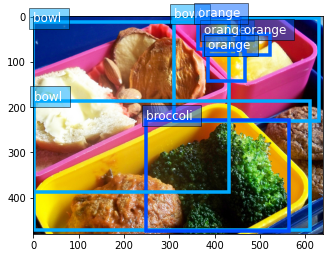

In [17]:
train_image, train_label = train_dataset[0]
bounding_boxes = train_label[:, :4]
class_ids = train_label[:, 4:5]
print('Image size (height, width, RGB):', train_image.shape)
print('Num of objects:', bounding_boxes.shape[0])
print('Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):\n',
      bounding_boxes)
print('Class IDs (num_boxes, ):\n', class_ids)

utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    labels=class_ids, class_names=train_dataset.classes)
plt.show()

Image size (height, width, RGB): (640, 640, 3)
Num of objects: 5
Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):
 [[ 20.9  207.14 357.59 600.11]
 [240.63 125.65 507.08 615.4 ]
 [497.72 183.53 528.76 196.11]
 [ 22.9  100.85 213.99 191.33]
 [518.48 251.89 618.76 373.65]]
Class IDs (num_boxes, ):
 [[ 3.]
 [ 0.]
 [ 2.]
 [ 7.]
 [28.]]


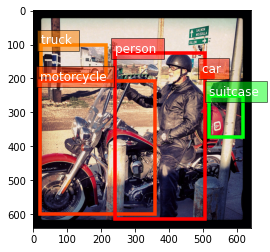

In [18]:
train_image, train_label = train_dataset[1000]
bounding_boxes = train_label[:, :4]
class_ids = train_label[:, 4:5]
print('Image size (height, width, RGB):', train_image.shape)
print('Num of objects:', bounding_boxes.shape[0])
print('Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):\n',
      bounding_boxes)
print('Class IDs (num_boxes, ):\n', class_ids)

utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    labels=class_ids, class_names=train_dataset.classes)
plt.show()

In [19]:
train_label

array([[ 20.9 , 207.14, 357.59, 600.11,   3.  ],
       [240.63, 125.65, 507.08, 615.4 ,   0.  ],
       [497.72, 183.53, 528.76, 196.11,   2.  ],
       [ 22.9 , 100.85, 213.99, 191.33,   7.  ],
       [518.48, 251.89, 618.76, 373.65,  28.  ]])

We have pictures with different sizes but same color scheme.



In [23]:
import numpy as np
import os, json, cv2, random

In [ ]:
!git clone https://github.com/facebookresearch/detectron2.git


In [33]:
!pip install -e detectron2

Obtaining file:///content/detectron2
     |████████████████████████████████| 49 kB 3.9 MB/s 
     |████████████████████████████████| 74 kB 3.9 MB/s 
     |████████████████████████████████| 145 kB 46.8 MB/s 
     |████████████████████████████████| 130 kB 58.5 MB/s 
     |████████████████████████████████| 743 kB 49.3 MB/s 
     |████████████████████████████████| 749 kB 55.6 MB/s 
     |████████████████████████████████| 596 kB 51.6 MB/s 
     |████████████████████████████████| 112 kB 54.9 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20211023-py3-none-any.whl size=60947 sha256=b8155479e429ff84edb0012395da082a442a4116b6700723ba3010a13aad50b4
  Stored in directory: /root/.cache/pip/wheels/16/98/fc/252d62cab6263c719120e06b28f3378af59b52ce7a20e81852
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=96f0eae4a468a2cf7fdd8ad296b14356127c608ec36a3b85232db61bf35c30d8
  Stored in directory: /root/.cache/pip/wheels/ca/33

In [36]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

ModuleNotFoundError: ignored

In [ ]:
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode